[src](http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching_files/control.pdf)

### Model Free Control
* On Policy MC Control
* On Policy Temporal Difference Learning
* Off Policy learning

## On Policy MC 
* learning on the job
* learn about policy $\pi$ from experience sampled from $\pi$
* whereas off policy - "look over someone's shoulder" 
* generalized policy iteration = policy eval + policy improvement

### $\epsilon$ greedy exploration
* $\pi(a|s) = \epsilon / m $ otherwise

### $\epsilon$ greedy policy improvement
* $q_\pi (s, \pi'(s)) = \sum_{a \in A} \pi'(a|s) q_\pi (s,a)$
* $= \epsilon / m \sum_a q_\pi (s,a) + (1 - \epsilon) max_a q_\pi (s,a)$

### MC Control
* instead of exploring the full space, explore just the MC episode
* update Q after every episode
* then do epsilon greedy policy improvement

### MC vs TD
* temporal difference has a few adv:
    * lower variance
    * online
    * incomplete sequences
* instead of MC, do TD on Q(s,a)
    * update time step

### SARSA
* updating action value functions with SARSA
* start with S,A, with reward R
    * land in new state S'
    * sample from A'
* $Q(s,a) = Q(s,a) + \alpha (R + \gamma Q(s',a') - Q(s,a))$
* n-step SARSA
    * $q_t^n = R_{t+1} + \gamma R_{t+2} + ... + \gamma^{n-1} R_n$

### Sarsa ($\lambda$) - forward computation
* computationally convenient
* using weights $q_t^\lambda = (1 - \lambda) \sum_{n=1} \lambda^{n-1} q_t^n$
* $Q(S_t, A_t) <- Q(S_t, A_t) + \alpha (q_t^\lambda - Q(S_t, A_t))$
* ^ note using lambda instead of $\gamma$
* problem is that it's not online
    * need to wait until end of episode

### Sarsa ($\lambda$) - backward computation
* use eligibility trace
* $E_t(s,a) = \gamma \lambda E_{t-1} (s,a) + 1(S_t = s, A_t = a)$
    * $E_0 = 0$
    * $E_1 = 0 + 1 = 1$
    * $E_2 = \gamma \lambda + 1$
    * $E_3 = \gamma \lambda (\gamma \lambda + 1) + 1$
* update
    * $\delta_t = R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)$
    * $Q(s,a) = Q(s,a) + \alpha \delta_t E_t(s,a)$
    * note: eligibility trace increases...

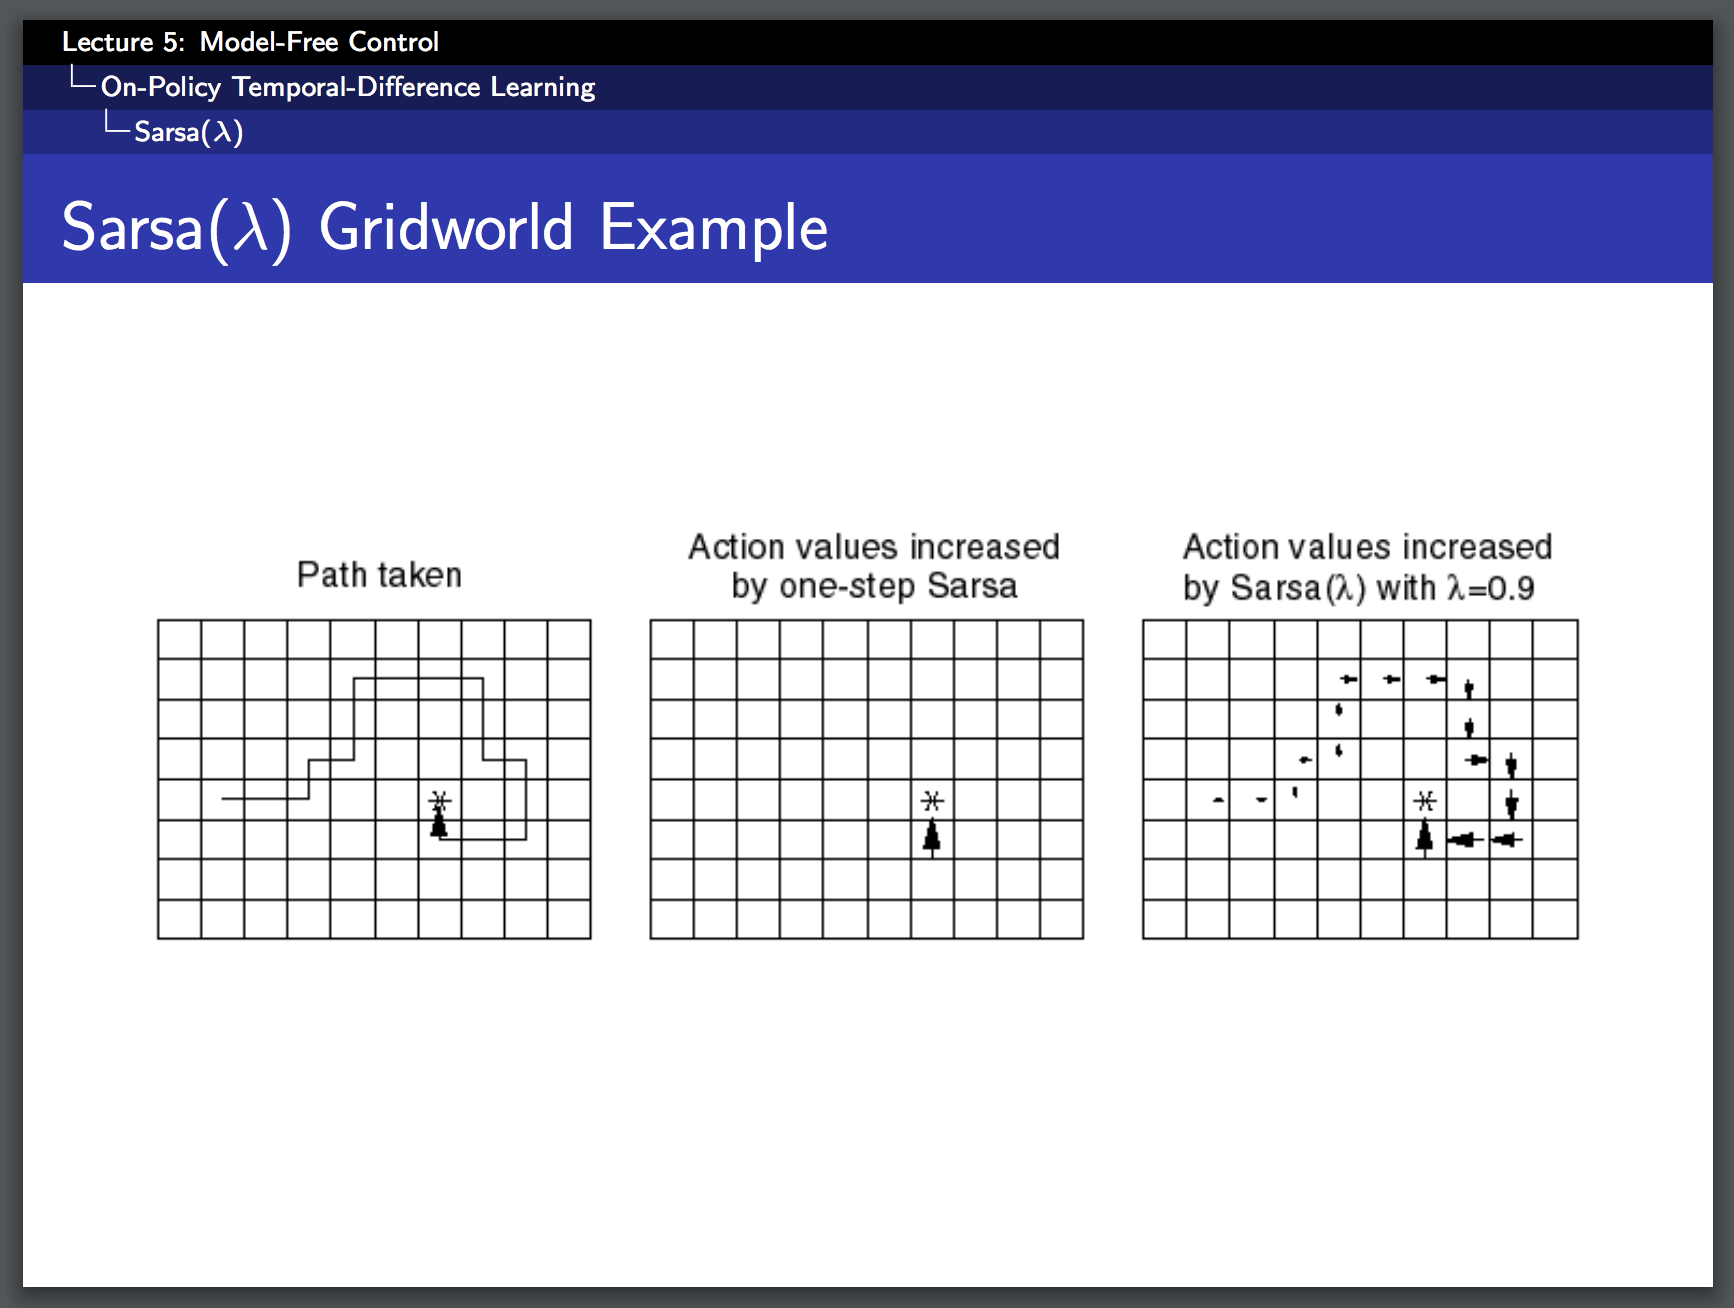

In [1]:
from IPython.display import Image
Image(filename='images/sarsa_example.png') 

### off policy learning
* 